In [1]:
from Trainer import *
import pandas as pd
from sklearn.model_selection import train_test_split
%reload_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("./data.csv",sep=';')
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,TARGET
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df_train, df_test = train_test_split(df,test_size=0.2,random_state=42)
print(df_train.shape,df_test.shape)

(24000, 25) (6000, 25)


In [4]:
feats = list(df.columns)
feats.remove("TARGET")
feats.remove("ID")

In [5]:
treinador = Trainer(df_train = df_train, df_test=df_test, features=feats, target='TARGET')

In [6]:
treinador.tuner(n_trials=50,name='opt_1',tracking=True,tracking_uri="sqlite:///final_model.db")

/workspaces/ml_utils/Trainer.py:118: ExperimentalWarning: MLflowCallback is experimental (supported from v1.4.0). The interface can change in the future.
  mlflc = optuna.integration.MLflowCallback(


  0%|          | 0/50 [00:00<?, ?it/s]

Training until validation scores don't improve for 3 rounds
Training until validation scores don't improve for 3 rounds
Did not meet early stopping. Best iteration is:
[18]	train's auc: 0.774068	valid's auc: 0.774127
Early stopping, best iteration is:
[15]	train's auc: 0.76927	valid's auc: 0.780041
Training until validation scores don't improve for 3 rounds
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[3]	train's auc: 0.761085	valid's auc: 0.750739
Training until validation scores don't improve for 3 rounds
Did not meet early stopping. Best iteration is:
[20]	train's auc: 0.774445	valid's auc: 0.775967
Early stopping, best iteration is:
[17]	train's auc: 0.776248	valid's auc: 0.761847


2023/09/06 01:38:42 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2023/09/06 01:38:42 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.


Training until validation scores don't improve for 3 rounds
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[1]	train's auc: 0.693434	valid's auc: 0.698263
Training until validation scores don't improve for 3 rounds
Training until validation scores don't improve for 3 rounds
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[4]	train's auc: 0.710674	valid's auc: 0.708185Early stopping, best iteration is:
[2]	train's auc: 0.71182	valid's auc: 0.703397

Early stopping, best iteration is:
[5]	train's auc: 0.742378	valid's auc: 0.749216
Early stopping, best iteration is:
[14]	train's auc: 0.760548	valid's auc: 0.748405
Training until validation scores don't improve for 3 rounds
Early stopping, best iteration is:
[1]	train's auc: 0.733687	valid's auc: 0.730416Training until validation scores don't improve for 3 rounds

Training until validation scores don't improve for 3 rounds
Training until validat

In [7]:
modelo = treinador.final_model(name='modelos_finais',run_name='final_1',tracking=True,tracking_uri="sqlite:///final_model.db")

[LightGBM] [Info] Number of positive: 5323, number of negative: 18677
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221792 -> initscore=-1.255256
[LightGBM] [Info] Start training from score -1.255256
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

/tmp/ipykernel_30923/760355928.py:1: ExperimentalWarning:

plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.



<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

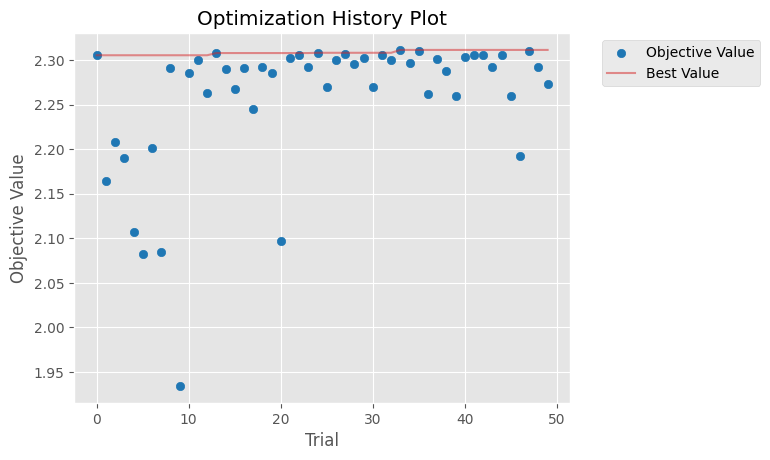

In [16]:
optuna.visualization.matplotlib.plot_optimization_history(treinador.study)

/tmp/ipykernel_30923/2491759506.py:1: ExperimentalWarning:

plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.



<Axes: title={'center': 'Hyperparameter Importances'}, xlabel='Importance for Objective Value', ylabel='Hyperparameter'>

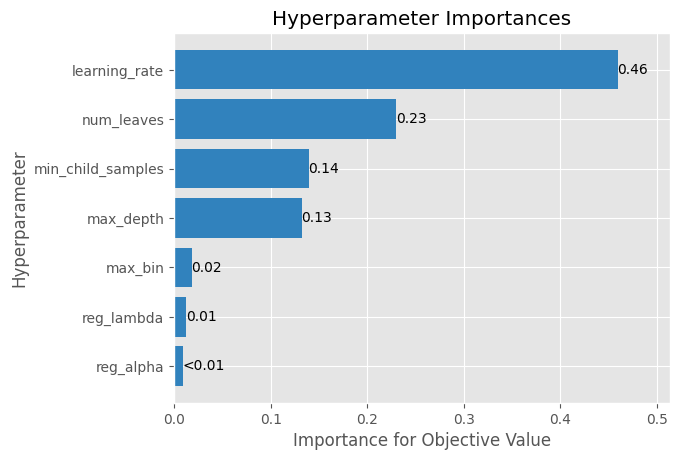

In [14]:
optuna.visualization.matplotlib.plot_param_importances(treinador.study)

/tmp/ipykernel_30923/1714754924.py:1: ExperimentalWarning:

plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.



<Axes: title={'center': 'Hyperparameter Importances'}, xlabel='Importance for duration', ylabel='Hyperparameter'>

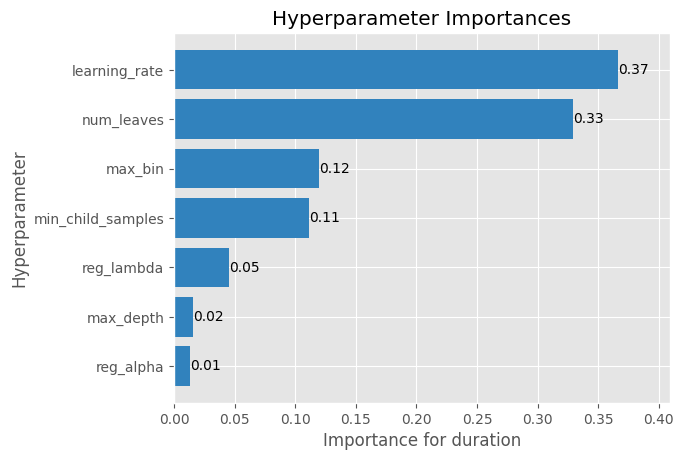

In [15]:
optuna.visualization.matplotlib.plot_param_importances(
    treinador.study, target=lambda t: t.duration.total_seconds(), target_name="duration"
)